In [41]:
"""
Spread of forest fires and infectious disease
The project aims to create a simple model to simulate forest fires.
"""
import numpy as np
import pylab as plt
import matplotlib
import matplotlib.animation as animation


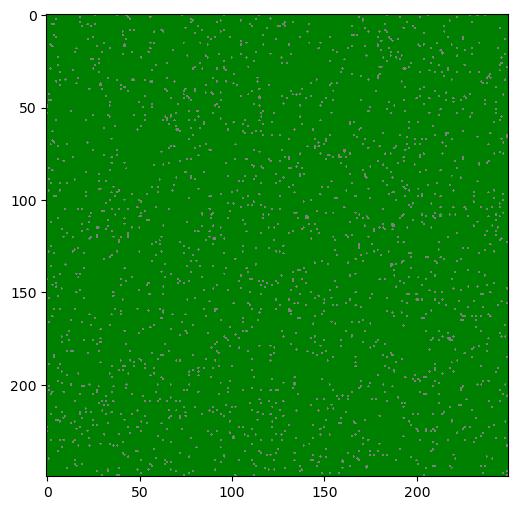

In [43]:

#Size of the forest
Nx = 250
Ny = 250

#Creat a matrix representing the forest
forest = 1*np.ones((Nx,Ny),dtype=int)

# Setup colors for plotting
colorsList = ['gray','green','red']
forest_cmap = matplotlib.colors.ListedColormap(colorsList)

# Probablities for empty spots and trees on fire.
p_bare = 0.03
p_fire = 0.000025

# Probability the fire spreads to adjacent spots.
p_spread = 0.7

#Initialize the variables
fires = 0
grounds = 0
trees = Nx*Ny-fires-grounds
t = 0

#Initialize the lists to track the changes of the variables
fire_list = []
ground_list = []
tree_list = []
t_list = []
images = []

#Create an empty canvas
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot()

#0 represents bare ground
#1 represents trees not burning
#2 represents trees that are already fired
#3 represents trees just caught fire in the current step

#Define a function for referring to the 4 neighbors of a center spot
def neighbors(i,j):
    return (i,j-1),(i,j+1),(i-1,j),(i+1,j)

#Set some bare ground at the begining
for i in range(0,Nx):
    for j in range(0,Nx):
        if np.random.rand(1,1) < p_bare:
            forest[i,j] = 0
            grounds = grounds + 1
            trees = trees - 1

ground_list.append(grounds)
tree_list.append(trees)
fire_list.append(fires)
t_list.append(t)

#Store the first frame in a collection of images
im = ax.imshow(forest,cmap=forest_cmap,vmin=0,vmax=2)                
images.append([im])

plt.imshow(forest,cmap=forest_cmap,vmin=0,vmax=2) 

#Set some initial fires randomly
while fires == 0:
    for i in range(0,Nx):
        for j in range(0,Nx):
            #Only forests can get fires
            if forest[i,j] == 1:
                if np.random.rand(1,1) < p_fire:
                    forest[i,j] = 2
                    fires = fires + 1
                    trees = trees - 1
t = t + 1 

ground_list.append(grounds)
tree_list.append(trees)
fire_list.append(fires)
t_list.append(t)


Doneogress: timeframe 225


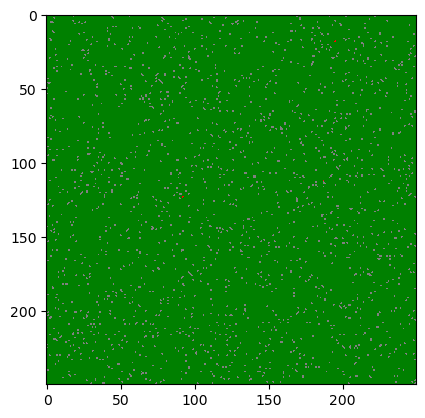

In [45]:

#Store the second frame in the collection of images
im = ax.imshow(forest,cmap=forest_cmap,vmin=0,vmax=2)                
images.append([im])

plt.imshow(forest,cmap=forest_cmap,vmin=0,vmax=2) 
fig.savefig('t='+str(t)+'.png')

#Set neighbors nodes on fire based on the probability of spreading, then turn the burnt out nodes into bare ground
while fires > 0:
    for i in range(0,Nx):
        for j in range(0,Nx):
            if forest[i,j] == 2:
                #fire spreads to neighbors
                for x,y in neighbors(i,j):
                    if (x>=0) & (x<=Nx-1) & (y>=0) & (y<=Ny-1):
                        if forest[x,y] == 1:
                            if np.random.rand(1,1) < p_spread:
                                forest[x,y] = 3
                                fires = fires + 1
                                trees = trees - 1
                #Burnt nodes become bare ground          
                forest[i,j] = 0
                fires = fires - 1
                grounds = grounds + 1
                
                
    #The nodes that were ignited in the last step are now considered as nodes that are already on fire in the new step.
    for i in range(0,Nx):
        for j in range(0,Nx):
                if forest[i,j] == 3:
                    forest[i,j] = 2
                    
    t = t + 1
    print(f'# progress: timeframe {t}',end = '\r',flush = True)
    
    ground_list.append(grounds)
    tree_list.append(trees)
    fire_list.append(fires)
    t_list.append(t)
    
    #Store the frames of fire-spreading process in the collection of images                    
    im = ax.imshow(forest,cmap=forest_cmap,vmin=0,vmax=2)                
    images.append([im])
    
    #Save the images every 20 iterations
    if t%20 == 1:
        fig.savefig('t='+str(t)+'.png')

print('Done')

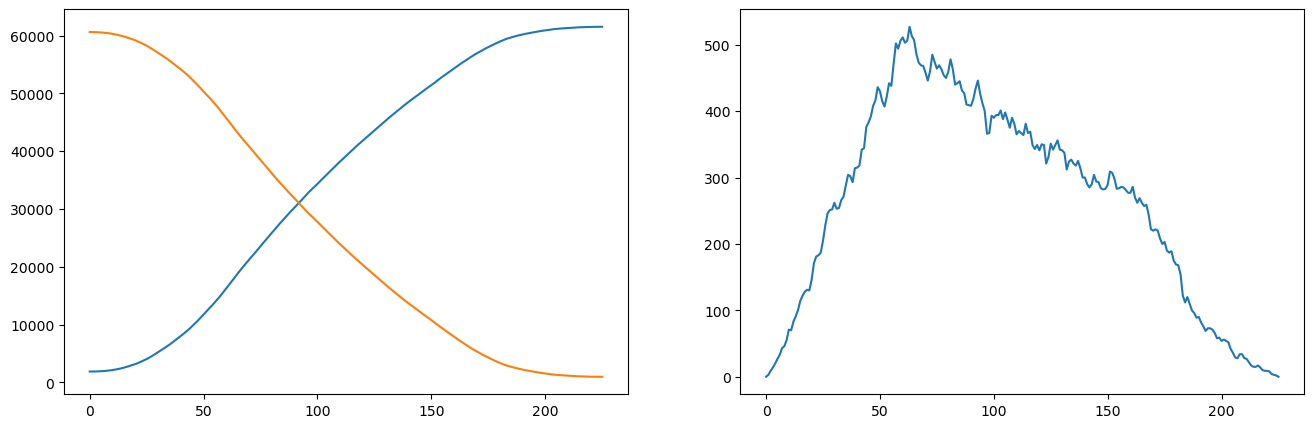

In [47]:
#Illustrate how the total number of nodes of bare ground, trees and fire change with ongoing iteration
fig_1 = plt.figure(figsize=(16,5))
ax1=plt.subplot(1,2,1)   
plt.plot(t_list,ground_list,tree_list)
ax2=plt.subplot(1,2,2)   
plt.plot(t_list,fire_list)
fig_1.savefig('spreading'+str(p_spread)+'.png')

#Create the animation of forest fire and save as .gif
ani = animation.ArtistAnimation(fig,images, interval=100,blit=False)
ani.save('Forest_Fire.gif',writer = 'pillow')
plt.show() 